## **Ejercicio 3**

### **Teoría**

---
1. Compare críticamente:
    - Método de Euler vs. Runge-Kutta para la integración

        **Contrate de la estabilidad y cómo el tamaño del paso la afecta**
    
        En el caso del método de Euler, su estabilidad depende críticamente del tamaño del paso h. Para ecuaciones lineales de la forma $y' = λy$, requiere que $|1 + hλ| ≤ 1$. En el caso del efecto del tamaño del paso, con los pasos grandes el método puede irse convirtiendo inestable y empieza a producir oscilaciones, ya que se requiere pasos muy pequeños para mantener estabilidad en sistemas stiff. Donde básicamnete la reducción del paso mejora la precisión pero aumenta el costo computacional linealmente.

        Ahora bien, en el método Runge-Kutta se considera más estable que el método de Euler si ambos tienen el mismo tamaño del paso. Ya que tiene una región más grande/amplia que Euler. Ya que este puede aguntar/tolerar pasos más grandes donde la estabilidad se mantiene mejor en sistemas no lineales y suele ser menos sensible a variaciones bruscas en la función.

    - Compensación entre precisión y coste computacional.

        El método de Euler es capz de realizar una sola evaluación de función por paso, ya que su implementación se considera simple y directa y como ventaja se tiene un menor uso de memoria. Pero como desventaja se tiene que el error de orden $O(h²)$, requiere pasos muy pequeños para precisión aceptable, teniendo mayor número total de iteraciones para alcanzar precisión deseada.

        Por otro lado, el método de Runge-Kutta tiene como ventaja que su error de orden $O(h⁵)$, es mucho más preciso; permitiendo usar pasos más grandes manteniendo precisión y menor número total de pasos para la misma precisión. Ahora bien, como desventaja es que este requiere 4 evalaciones de función por paso como tambien es más complejo a niverl   computacional por paso individual usando mayor capacidad de memoria para almacenar valores intermedios
        


---
2. Explique cómo los retrasos en los ciclos de retroalimentación (p. ej., el retraso en las pruebas durante epidemias) afectan el comportamiento del sistema.

    Lo que puede ocurrir de estos retrasos es que el sistema oscile alrededor del punto de equilibrio haciendo que este reaccione excesivamente debido a información desactualizada o bien retrasos bastante largos que pueden desestabilizar sistemas naturalmente estables. Por ejemplo tomando en cuenta las epidemias, se pueden encontrar el retraso de detección donde los casos detectados no reflejan la situación actual o bien el retraso en respuesta donde las medidas se implementan basándose en datos obsoletos. Provocando un efecto acumulativo, siendo esto un retrado total donde se  amplifica la desconexión entre la realidad y la acción ; detección + procesamiento + respuesta. Donde como consecuencias se tienen ondas de infección más pronunciadas haciendo que haya dificultad para controlar brotes

---
3. Proponga un modelo de stock-flujo para:
    - Capacidad hospitalaria durante una epidemia.
    - Incluir las camas de UCI como stock y los ingresos/altas como flujos.

## **Modelo de Stock-Flujo: Capacidad Hospitalaria UCI durante Epidemia**

### **Stocks (Acumuladores):**

| **Stock** | **Descripción** | **Unidad** |
|-----------|-----------------|------------|
| **Capacidad Total de Camas UCI** | Capacidad instalada en UCI (puede variar por ampliaciones/reducciones) | Camas |
| **Camas UCI Ocupadas** | Pacientes internados actualmente en UCI | Pacientes |
| **Pacientes en Espera** | Cola de pacientes que requieren ingreso a UCI | Pacientes |

### **Flujos (Tasas):**

| **Flujo**                   | **Dirección**                                                   | **Descripción**                                                       | **Unidad (ej.)** |
| --------------------------- | --------------------------------------------------------------- | --------------------------------------------------------------------- | ---------------- |
| **Ingreso a UCI**           | Entrada a `Camas UCI Ocupadas`                                  | Pacientes críticos ingresan desde urgencias, sala general o traslados | Pacientes/día    |
| **Alta UCI**                | Salida de `Camas UCI Ocupadas`                                  | Incluye altas médicas, fallecimientos, y derivaciones                 | Pacientes/día    |
| **Demanda No Atendida**     | Entrada a `Pacientes en Espera`                                 | Casos graves que requieren UCI pero no hay camas disponibles          | Pacientes/día    |
| **Asignación desde Espera** | Salida de `Pacientes en Espera`, Entrada a `Camas UCI Ocupadas` | Pacientes en espera que ingresan cuando hay camas libres              | Pacientes/día    |
| **Ampliación de Capacidad** | Entrada a `Capacidad Total UCI`                                 | Adición de camas temporales o fijas                                   | Camas/día        |
| **Reducción de Capacidad**  | Salida de `Capacidad Total UCI`                                 | Reducción por mantenimiento, falta de personal o recursos             | Camas/día        |


### **Variables Auxiliares:**

| **Variable**| **Descripción** | **Fórmula (ej.)**|
| ----------- | --------------- | ---------------- |
| **Camas Disponibles**  | Camas que no están ocupadas      | `Capacidad Total - Camas Ocupadas`     |
| **Tasa de Ocupación**  | Porcentaje de uso de UCI         | `(Camas Ocupadas / Capacidad Total) × 100` |
| **Tiempo Promedio de Estancia** | Duración media de internación | `Camas Ocupadas / Alta UCI`  |
| **Tasa de Demanda UCI** | Casos diarios que requieren UCI | Exógena o derivada del modelo epidemiológico    |
| **Tasa de Asignación desde Espera** | Depende de la disponibilidad de camas y la política de prioridad | Mínimo entre camas libres y pacientes en espera |


### **Ecuaciones del Sistema:**

1. Camas UCI Ocupadas(t+dt) = Camas UCI Ocupadas(t) + (Ingresos UCI + Asignación desde Espera - Altas UCI) × dt

2. Pacientes en Espera(t+dt) = Pacientes en Espera(t) + (Demanda No Atendida - Asignación desde Espera) × dt

3. Capacidad Total UCI(t+dt) = Capacidad Total UCI(t) + (Ampliación de Capacidad - Reducción de Capacidad) × dt

4. Camas Disponibles(t) = Capacidad Total UCI(t) - Camas UCI Ocupadas(t)

5. Tasa de Ocupación(%) = (Camas UCI Ocupadas / Capacidad Total UCI) × 100


### **Bucles de Retroalimentación:**

1. **Bucle de Saturación Negativa (Retraso en atención):**

   Mayor ocupación → Menos camas disponibles → Aumenta cola de espera → Peor desenlace → Más fallecimientos o deterioro

2. **Bucle de Adaptación de Capacidad (Respuesta estructural):**

   Aumento en pacientes → Alta ocupación → Activación de ampliación de camas → Mejora en disponibilidad

3. **Bucle de Recursos Humanos (Cuidado del personal):**

   Alta ocupación prolongada → Fatiga del personal → Menor eficiencia → Mayor tiempo de estancia → Más ocupación



### **Restricciones que enfrentaría el Sistema:**

- **Capacidad física máxima**: Límite de espacio o camas que se pueden instalar.
- **Personal sanitario disponible**: Relación mínima de personal por cama.
- **Infraestructura crítica**: Ventiladores, oxígeno, medicamentos.
- **Tiempo de implementación de nuevas camas**: No es instantáneo, puede tener retrasos logísticos.
- **Capacidad de coordinación regional**: Limitaciones en derivaciones a otros centros.

---
4. Para el Método de Euler
    - Indique cómo se define el error local de truncamiento
    - Enumere dos ventajas y desventajas del método
    - Explique el algoritmo

## **Método de Euler**

### **Error Local de Truncamiento**

El **error local de truncamiento** del método de Euler se define como la diferencia entre la solución exacta y la aproximación numérica en un solo paso, donde se asume que el punto inicial es considerado  exacto.

**Definición matemática:**
$$
Error Local de Truncamiento (ELT) = y(xₙ₊₁) - yₙ₊₁
$$

Donde:
- $y(xₙ₊₁)$ = es la solución exacta en el punto $xₙ₊₁$
- $yₙ₊₁$ = es la aproximación de Euler en el punto $xₙ₊₁$

**Derivación del error:**
Usando la expansión de Taylor de $y(xₙ₊₁)$ alrededor de $xₙ$:

$$
y(xₙ₊₁) = y(xₙ) + h·y'(xₙ) + (h²/2!)·y''(ξ)
$$
Método de Euler: $yₙ₊₁ = yₙ + h·f(xₙ, yₙ)$

Por tanto: $ELT = (h²/2!)·y''(ξ) = O(h²)$


### **Ventajas y Desventajas**

| **Ventajas** | **Desventajas** |
|-------------------|-------------------|
| **Simplicidad de implementación**: Es un algoritmo directo y fácil de programar | **Baja precisión**: Error de orden O(h²) requiere pasos muy pequeños |
| **Bajo costo computacional por paso**: Solo requiere una evaluación de f(x,y) | **Inestabilidad numérica**: Suele ser sensible a pasos grandes, especialmente en sistemas stiff |
| **Mínimo uso de memoria**: No necesita almacenar valores intermedios | **Convergencia lenta**: Necesita muchas iteraciones para alcanzar precisión aceptable |
| **Fácil de entender conceptualmente**: Basado en la definición de derivada | **Acumulación de errores**: Los errores se propagan y amplifican a lo largo del tiempo |

### **Algoritmo del Método de Euler**

#### **Formulación General:**
Para resolver la ecuación diferencial: **dy/dx = f(x, y)** con condición inicial **y(x₀) = y₀**

#### **Los pasos del Algoritmo:**

ENTRADA:
   - Función $f(x, y)$
   - Condición inicial: $(x₀, y₀)$
   - Tamaño del paso: $h$
   - Punto final: $xₙ$

PROCESO:
   1. Inicializar: $x = x₀$, $y = y₀$
   
   2. Para i = 0, 1, 2, ..., n-1:
      a) Calcular: $yᵢ₊₁ = yᵢ + h · f(xᵢ, yᵢ)$
      b) Actualizar:$ xᵢ₊₁ = xᵢ + h$
      c) Almacenar punto: $(xᵢ₊₁, yᵢ₊₁)$
   
   3. Repetir hasta alcanzar $xₙ$

SALIDA:
   - Conjunto de puntos aproximados: ${(x₀,y₀), (x₁,y₁), ..., (xₙ,yₙ)}$

#### **Ejemplo de pseudocódigo:**

```js
FUNCIÓN Euler(f, x0, y0, h, xfinal):
    
    // Inicialización
    x = x0
    y = y0
    puntos = [(x, y)]
    
    // Bucle principal
    MIENTRAS x < xfinal:
        // Cálculo de la pendiente en el punto actual
        pendiente = f(x, y)
        
        // Aproximación lineal para el siguiente punto
        y_nuevo = y + h * pendiente
        x_nuevo = x + h
        
        // Actualización
        x = x_nuevo
        y = y_nuevo
        
        // Almacenar resultado
        puntos.append((x, y))
    
    RETORNAR puntos
```

#### **Interpretación Geométrica:**

El método de Euler aproxima la curva solución mediante **segmentos de recta tangentes**:

1. **En cada punto** (xₙ, yₙ), calcula la pendiente usando f(xₙ, yₙ)
2. **Traza una línea recta** con esa pendiente por una distancia h
3. **El punto final** de la línea se convierte en la nueva aproximación
4. **Repite el proceso** hasta cubrir todo el intervalo

### **Estabilidad:**

**Condición de estabilidad para ecuaciones lineales** y' = λy:
```
|1 + hλ| ≤ 1

Para λ < 0 (sistema estable): h ≤ 2/|λ|
```

**Implicaciones prácticas:**
- Sistemas **stiff** (|λ| muy grande) requieren h extremadamente pequeño
- La estabilidad **limita el tamaño del paso** más que la precisión
- **Trade-off** entre estabilidad y eficiencia computacional

5. Para el método de Runge-Kutta (RK4):
    - Explique el algoritmo y principalmente los cuatro pasos intermedios
    - Compare el error global con el de Euler
    - ¿Cuándo vale la pena utilizar RK4 considerando el costo computacional?

El método RK4 utiliza **cuatro evaluaciones de la función** en cada paso para obtener una aproximación más precisa de la solución.

#### **Formulación del Algoritmo:**

Para resolver **dy/dx = f(x, y)** con condición inicial **y(x₀) = y₀**:

```
PASO 1 - Pendiente al inicio del intervalo:
k₁ = h × f(xₙ, yₙ)

PASO 2 - Pendiente en el punto medio usando k₁:
k₂ = h × f(xₙ + h/2, yₙ + k₁/2)

PASO 3 - Pendiente en el punto medio usando k₂:
k₃ = h × f(xₙ + h/2, yₙ + k₂/2)

PASO 4 - Pendiente al final del intervalo usando k₃:
k₄ = h × f(xₙ + h, yₙ + k₃)

COMBINACIÓN PONDERADA:
yₙ₊₁ = yₙ + (k₁ + 2k₂ + 2k₃ + k₄)/6
```

#### **Cuatro Pasos:**

| **Paso** | **Ubicación** | **Propósito** | **Interpretación** |
|----------|---------------|---------------|-------------------|
| **k₁** | Inicio (xₙ, yₙ) | Pendiente inicial | Estimación básica como en Euler |
| **k₂** | Punto medio con k₁ | Corrección intermedia | Mejora usando la primera estimación |
| **k₃** | Punto medio con k₂ | Refinamiento | Mejora usando la estimación corregida |
| **k₄** | Final con k₃ | Pendiente final | Estimación al final del intervalo |

#### **Ejemplo de pseudocódigo:**

```js
FUNCIÓN RungeKutta4(f, x0, y0, h, xfinal):
    
    // Inicialización
    x = x0
    y = y0
    puntos = [(x, y)]
    
    // Bucle principal
    MIENTRAS x < xfinal:
        // Los cuatro pasos del método RK4
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)
        
        // Combinación ponderada
        y_nuevo = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        x_nuevo = x + h
        
        // Actualización
        x = x_nuevo
        y = y_nuevo
        
        // Almacenar resultado
        puntos.append((x, y))
    
    RETORNAR puntos
```

### **Comparación del Error Global: RK4 vs Euler**

| **Aspecto** | **Método de Euler** | **Runge-Kutta RK4** |
|-------------|-------------------|-------------------|
| **Error Local** | O(h²) | O(h⁵) |
| **Error Global** | O(h) | O(h⁴) |
| **Convergencia** | Lineal | Cuártica |
| **Estabilidad** | Limitada | Superior |

#### **Análisis Matemático del Error:**

```
ERROR LOCAL:
• Euler: EL_Euler ≈ (h²/2) × y''(ξ)
• RK4: EL_RK4 ≈ (h⁵/120) × y⁽⁵⁾(ξ)

ERROR GLOBAL (acumulado):
• Euler: EG_Euler ≈ (h/2) × M × (e^(LT) - 1)
• RK4: EG_RK4 ≈ (h⁴/120) × M × T

Donde:
- M = cota de la derivada correspondiente
- L = constante de Lipschitz
- T = longitud del intervalo
```

#### **Ejemplo**

```
Para h = 0.1:
• Error Euler ∝ h¹ → Si h se reduce a la mitad, error se reduce a 2×
• Error RK4 ∝ h⁴ → Si h se reduce a la mitad, error se reduce a 16×

Para h = 0.01:
• Mejora Euler: 10× más preciso que h = 0.1
• Mejora RK4: 10,000× más preciso que h = 0.1
```
#### **Comparación de Costos Computacionales:**

| **Métrica** | **Euler** | **RK4** | **Ratio RK4/Euler** |
|-------------|-----------|---------|-------------------|
| **Evaluaciones por paso** | 1 | 4 | 4× |
| **Operaciones por paso** | Mínimas | Moderadas | ~5× |
| **Memoria requerida** | Mínima | Moderada | ~4× |


En el caso de RK4 es preferible utilizarlo para realizar simulaciones científicas críticas como tambien en sistemas de navegación espacial o bien cuando h no puede ser muy pequeño por limitaciones computacionales haciendo simulaciones de largo plazo (años, décadas). Añadiendo que son funciones simples que se calculan rápidamente y no hay consultas a bases de datos o cálculos complejos. Ahora bien Euler puede ser mehor para sistemas embebidos con poca memoria o bien para cálculos de elementos finitos.



#### **Ejemplo:**

**Caso:** Modelado de epidemia COVID-19 para 365 días

```
COMPARACIÓN:
• Euler con h=0.1 días: 3,650 pasos, Error ~1%
• RK4 con h=1.0 días: 365 pasos, Error ~0.01%

RESULTADO:
• RK4: 10× menos pasos, 100× más preciso
• Costo total RK4 ≈ 40% del costo de Euler
• GANADOR: RK4 por amplio margen
```

### **Recomendaciones:**

1. Para la mayoría de aplicaciones científicas consideramos que es mejor usar RK4, o bien para sistemas en tiempo real hay que considerar Euler si el tiempo es crítico y para alta precisión usar RK4 o métodos de orden superior. 

### **Práctica**

Compare los métodos numéricos (Euler y RK4) para resolver un sistema no lineal
Instrucciones:

1. Implemente ambos métodos para:
    - Modelo de crecimiento logístico
    - Parámetros: r=0.1, K=1000, x₀=10
    - Horizonte de tiempo: 100 unidades

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# Parámetros del modelo 
r = 0.1      # Tasa de crecimiento
K = 1000     # Capacidad de carga
x0 = 10      # Población inicial
T = 100      # Horizonte de tiempo

# Ecuación diferencial del crecimiento logístico dx/dt = r * x * (1 - x/K)
def crecimiento_logistico(t, x, r, K):
    return r * x * (1 - x/K)

#  Solución analítica del crecimiento logístico x(t) = K / (1 + ((K-x0)/x0) * exp(-r*t))
def solucion_analitica(t, x0, r, K):
    return K / (1 + ((K - x0) / x0) * np.exp(-r * t))

#Implementación del método de Euler
def metodo_euler(f, t0, x0, h, T, params):
    r, K = params
    n_steps = int((T - t0) / h)
    
    t_vals = np.zeros(n_steps + 1)
    x_vals = np.zeros(n_steps + 1)
    
    # Condiciones iniciales
    t_vals[0] = t0
    x_vals[0] = x0
    
    # Iteración de Euler
    for i in range(n_steps):
        t_vals[i + 1] = t_vals[i] + h
        x_vals[i + 1] = x_vals[i] + h * f(t_vals[i], x_vals[i], r, K)
    
    return t_vals, x_vals

#Implementación del método Runge-Kutta de 4to orden (RK4)
def metodo_rk4(f, t0, x0, h, T, params):
    r, K = params
    n_steps = int((T - t0) / h)
    
    t_vals = np.zeros(n_steps + 1)
    x_vals = np.zeros(n_steps + 1)
    
    # condiciones iniciales
    t_vals[0] = t0
    x_vals[0] = x0
    
    # iteración RK4
    for i in range(n_steps):
        t = t_vals[i]
        x = x_vals[i]
        
        # cuatro pasos del RK4
        k1 = h * f(t, x, r, K)
        k2 = h * f(t + h/2, x + k1/2, r, K)
        k3 = h * f(t + h/2, x + k2/2, r, K)
        k4 = h * f(t + h, x + k3, r, K)
        
        # combinación ponderada
        t_vals[i + 1] = t + h
        x_vals[i + 1] = x + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t_vals, x_vals

print("COMPARACIÓN DE MÉTODOS NUMÉRICOS: EULER vs RK4")
print("Modelo: Crecimiento Logístico")
print(f"Parámetros: r={r}, K={K}, x₀={x0}, T={T}")
print("=" * 60)

# tamaño de paso para análisis principal
dt = 1.0
params = (r, K)

# solución analítica 
t_analitica = np.linspace(0, T, 1000)
x_analitica = solucion_analitica(t_analitica, x0, r, K)

# implementación de ambos métodos
print(f"Calculando con Δt = {dt}...")

# Método de Euler
start_time = time.perf_counter()
t_euler, x_euler = metodo_euler(crecimiento_logistico, 0, x0, dt, T, params)
tiempo_euler = time.perf_counter() - start_time

# Método RK4
start_time = time.perf_counter()
t_rk4, x_rk4 = metodo_rk4(crecimiento_logistico, 0, x0, dt, T, params)
tiempo_rk4 = time.perf_counter() - start_time

print(f"Tiempo Euler: {tiempo_euler:.6f} segundos")
print(f"Tiempo RK4: {tiempo_rk4:.6f} segundos")

# acá se trato de que se  evitaran divisiones por cero
if tiempo_euler > 0:
    ratio_temporal = tiempo_rk4 / tiempo_euler
    print(f"Ratio temporal RK4/Euler: {ratio_temporal:.2f}")
else:
    print("Ratio temporal: Tiempos muy pequeños para medir con precisión")
    
print(f"Número de pasos: {len(t_euler)-1}")
print(f"Valor final Euler: {x_euler[-1]:.2f}")
print(f"Valor final RK4: {x_rk4[-1]:.2f}")
print(f"Valor analítico final: {solucion_analitica(T, x0, r, K):.2f}")

COMPARACIÓN DE MÉTODOS NUMÉRICOS: EULER vs RK4
Modelo: Crecimiento Logístico
Parámetros: r=0.1, K=1000, x₀=10, T=100
Calculando con Δt = 1.0...
Tiempo Euler: 0.000351 segundos
Tiempo RK4: 0.000706 segundos
Ratio temporal RK4/Euler: 2.01
Número de pasos: 100
Valor final Euler: 995.72
Valor final RK4: 995.53
Valor analítico final: 995.53


 2. Analice y compare
    - Error relativo en t=50 para Δt=1.0
    - Threshold entre tiempo de cómputo y precisión
    - Estabilidad con Δt grandes (>5.0)

In [4]:

# valor exacto en t=50
t_50 = 50
x_exacto_50 = solucion_analitica(t_50, x0, r, K)

# valores aproximados en t=50
idx_50_euler = int(t_50 / dt)
idx_50_rk4 = int(t_50 / dt)

x_euler_50 = x_euler[idx_50_euler]
x_rk4_50 = x_rk4[idx_50_rk4]

# cálculo de errores relativos
error_relativo_euler = abs(x_euler_50 - x_exacto_50) / x_exacto_50 * 100
error_relativo_rk4 = abs(x_rk4_50 - x_exacto_50) / x_exacto_50 * 100

print("ANÁLISIS EN t=50 CON Δt=1.0")
print("=" * 40)
print(f"Valor exacto (analítico): {x_exacto_50:.6f}")
print(f"Euler: {x_euler_50:.6f}")
print(f"RK4: {x_rk4_50:.6f}")
print(f"Error relativo Euler: {error_relativo_euler:.6f}%")
print(f"Error relativo RK4: {error_relativo_rk4:.6f}%")
if error_relativo_rk4 > 0:
    print(f"Mejora RK4 vs Euler: {error_relativo_euler/error_relativo_rk4:.1f}x más preciso")

print("\n¿TIEMPO DE CÓMPUTO vs PRECISIÓN")
print("=" * 55)

# Diferentes tamaños de paso para análisis
pasos_analisis = [0.1, 0.5, 1.0, 2.0, 5.0]
resultados_threshold = []

for dt_test in pasos_analisis:
    # Euler
    start = time.perf_counter()
    t_e, x_e = metodo_euler(crecimiento_logistico, 0, x0, dt_test, T, params)
    tiempo_e = time.perf_counter() - start
    
    # RK4
    start = time.perf_counter()
    t_r, x_r = metodo_rk4(crecimiento_logistico, 0, x0, dt_test, T, params)
    tiempo_r = time.perf_counter() - start
    
    # error global al final del período
    x_final_exacto = solucion_analitica(T, x0, r, K)
    error_euler_final = abs(x_e[-1] - x_final_exacto) / x_final_exacto * 100
    error_rk4_final = abs(x_r[-1] - x_final_exacto) / x_final_exacto * 100
    
    # error × tiempo
    eficiencia_euler = error_euler_final * tiempo_e
    eficiencia_rk4 = error_rk4_final * tiempo_r
    
    resultados_threshold.append({
        'dt': dt_test,
        'pasos': int(T/dt_test),
        'tiempo_euler': tiempo_e,
        'tiempo_rk4': tiempo_r,
        'error_euler': error_euler_final,
        'error_rk4': error_rk4_final,
        'eficiencia_euler': eficiencia_euler,
        'eficiencia_rk4': eficiencia_rk4
    })

# visualización con DataFrame
df_threshold = pd.DataFrame(resultados_threshold)

print("\nRESULTADOS:")
print("Δt\t| Pasos\t| T_Euler\t| T_RK4\t\t| Err_E(%)\t| Err_RK4(%)\t| Ef_E\t\t| Ef_RK4")
print("-" * 95)
for _, row in df_threshold.iterrows():
    print(f"{row['dt']:.1f}\t| {row['pasos']}\t| {row['tiempo_euler']:.5f}\t| "
          f"{row['tiempo_rk4']:.5f}\t| {row['error_euler']:.4f}\t\t| "
          f"{row['error_rk4']:.4f}\t\t| {row['eficiencia_euler']:.6f}\t| {row['eficiencia_rk4']:.6f}")

# punto de equilibrio óptimo
mejor_euler = df_threshold.loc[df_threshold['eficiencia_euler'].idxmin()]
mejor_rk4 = df_threshold.loc[df_threshold['eficiencia_rk4'].idxmin()]

print(f"\nCONFIGURACIÓN ÓPTIMA:")
print(f"   Euler: Δt={mejor_euler['dt']:.1f} (Eficiencia: {mejor_euler['eficiencia_euler']:.6f})")
print(f"   RK4: Δt={mejor_rk4['dt']:.1f} (Eficiencia: {mejor_rk4['eficiencia_rk4']:.6f})")


# ANÁLISIS DE ESTABILIDAD CON Δt GRANDES (>5.0)


print("\nANÁLISIS DE ESTABILIDAD CON PASOS GRANDES (Δt > 5.0)")
print("=" * 60)

pasos_grandes = [5.0, 7.5, 10.0, 15.0, 20.0]
estabilidad_resultados = []

for dt_grande in pasos_grandes:
    try:
        # Euler con paso grande
        t_e_grande, x_e_grande = metodo_euler(crecimiento_logistico, 0, x0, dt_grande, T, params)
        estable_euler = not (np.any(x_e_grande < 0) or np.any(np.isnan(x_e_grande)) or np.any(x_e_grande > 2*K))
        
        # RK4 con paso grande
        t_r_grande, x_r_grande = metodo_rk4(crecimiento_logistico, 0, x0, dt_grande, T, params)
        estable_rk4 = not (np.any(x_r_grande < 0) or np.any(np.isnan(x_r_grande)) or np.any(x_r_grande > 2*K))
        
        # Error final si es estable
        x_final_exacto = solucion_analitica(T, x0, r, K)
        error_euler = abs(x_e_grande[-1] - x_final_exacto) / x_final_exacto * 100 if estable_euler else float('inf')
        error_rk4 = abs(x_r_grande[-1] - x_final_exacto) / x_final_exacto * 100 if estable_rk4 else float('inf')
        
    except:
        estable_euler = False
        estable_rk4 = False
        error_euler = float('inf')
        error_rk4 = float('inf')
    
    estabilidad_resultados.append({
        'dt': dt_grande,
        'estable_euler': estable_euler,
        'estable_rk4': estable_rk4,
        'error_euler': error_euler,
        'error_rk4': error_rk4
    })

# resultados de estabilidad
print("Δt\t| Euler Estable\t| RK4 Estable\t| Error Euler\t| Error RK4")
print("-" * 65)
for resultado in estabilidad_resultados:
    euler_status = "Estable " if resultado['estable_euler'] else "No estable"
    rk4_status = "Estable" if resultado['estable_rk4'] else "No estable"
    error_e = f"{resultado['error_euler']:.2f}%" if resultado['error_euler'] != float('inf') else "INESTABLE"
    error_r = f"{resultado['error_rk4']:.2f}%" if resultado['error_rk4'] != float('inf') else "INESTABLE"
    
    print(f"{resultado['dt']:.1f}\t| {euler_status}\t\t| {rk4_status}\t\t| {error_e}\t| {error_r}")

ANÁLISIS EN t=50 CON Δt=1.0
Valor exacto (analítico): 599.859602
Euler: 561.046633
RK4: 599.859118
Error relativo Euler: 6.470342%
Error relativo RK4: 0.000081%
Mejora RK4 vs Euler: 80266.2x más preciso

¿TIEMPO DE CÓMPUTO vs PRECISIÓN

RESULTADOS:
Δt	| Pasos	| T_Euler	| T_RK4		| Err_E(%)	| Err_RK4(%)	| Ef_E		| Ef_RK4
-----------------------------------------------------------------------------------------------
0.1	| 1000.0	| 0.00560	| 0.01051	| 0.0018		| 0.0000		| 0.000010	| 0.000000
0.5	| 200.0	| 0.00041	| 0.00123	| 0.0095		| 0.0000		| 0.000004	| 0.000000
1.0	| 100.0	| 0.00041	| 0.00095	| 0.0200		| 0.0000		| 0.000008	| 0.000000
2.0	| 50.0	| 0.00020	| 0.00090	| 0.0445		| 0.0000		| 0.000009	| 0.000000
5.0	| 20.0	| 0.00010	| 0.00025	| 0.1497		| 0.0016		| 0.000015	| 0.000000

CONFIGURACIÓN ÓPTIMA:
   Euler: Δt=0.5 (Eficiencia: 0.000004)
   RK4: Δt=0.1 (Eficiencia: 0.000000)

ANÁLISIS DE ESTABILIDAD CON PASOS GRANDES (Δt > 5.0)
Δt	| Euler Estable	| RK4 Estable	| Error Euler	| Error RK4
-

3. Considere y responda:
    - ¿Qué método mantiene mejor la estabilidad?
    - ¿Cómo escala el error con Δt en cada método?
    - ¿Cuándo convendría elegir Euler en lugar de RK4?

In [ ]:

print("\n¿QUÉ MÉTODO MANTIENE MEJOR LA ESTABILIDAD?")
print("-" * 50)

euler_estables = sum(r['estable_euler'] for r in estabilidad_resultados)
rk4_estables = sum(r['estable_rk4'] for r in estabilidad_resultados)

print(f"Euler mantiene estabilidad en {euler_estables}/{len(pasos_grandes)} casos con pasos grandes")
print(f"RK4 mantiene estabilidad en {rk4_estables}/{len(pasos_grandes)} casos con pasos grandes")

if rk4_estables > euler_estables:
    print("EL MEJOR: RK4 mantiene mejor estabilidad con pasos grandes")
    print("RAZÓN: RK4 tiene una región de estabilidad más amplia debido a su mayor orden de precisión")
elif euler_estables > rk4_estables:
    print("EL MEJOR : Euler mantiene mejor estabilidad con pasos grandes")
else:
    print(" Ambos métodos muestran estabilidad similar")

print(f"Para el crecimiento logístico con r={r}, el paso crítico de estabilidad está around Δt ≈ {2/r:.1f}")

print("\n¿CÓMO ESCALA EL ERROR CON Δt EN CADA MÉTODO?")
print("-" * 55)

# análisis de escalamiento del error
print("ESCALAMIENTO TEÓRICO:")
print("   • Euler: Error Global ∝ O(h¹) - Error se reduce linealmente con h")
print("   • RK4: Error Global ∝ O(h⁴) - Error se reduce cuárticamente con h")

print("\nESCALAMIENTO OBSERVADO (basado en resultados):")
# calcular ratios de error para pasos consecutivos
for i in range(len(df_threshold)-1):
    dt_actual = df_threshold.iloc[i]['dt']
    dt_siguiente = df_threshold.iloc[i+1]['dt']
    
    if dt_actual > dt_siguiente:  # reducción de paso
        ratio_dt = dt_actual / dt_siguiente
        ratio_error_euler = df_threshold.iloc[i]['error_euler'] / df_threshold.iloc[i+1]['error_euler']
        ratio_error_rk4 = df_threshold.iloc[i]['error_rk4'] / df_threshold.iloc[i+1]['error_rk4']
        
        print(f"   Δt: {dt_actual:.1f} → {dt_siguiente:.1f} (reducción {ratio_dt:.1f}×)")
        print(f"   └─ Error Euler se reduce {ratio_error_euler:.1f}× (esperado: {ratio_dt:.1f}×)")
        print(f"   └─ Error RK4 se reduce {ratio_error_rk4:.1f}× (esperado: {ratio_dt**4:.1f}×)")

print("\n¿CUÁNDO CONVENDRÍA ELEGIR EULER EN LUGAR DE RK4?")
print("-" * 60)

print("EULER ES PREFERIBLE CUANDO:")

print("\nRECURSOS LIMITADOS:")
print("   El método de Euler se convierte en la opción ideal cuando trabajamos con sistemas")
print("   embebidos que tienen memoria y CPU limitados, donde cada byte y ciclo de procesamiento")
print("   cuenta. También es preferible en simulaciones en tiempo real donde cada milisegundo")
print("   es crítico para mantener la sincronización, así como en cálculos masivos donde se")
print("   priorizan miles de simulaciones rápidas por encima de la precisión individual.")

print("\nFUNCIÓN COSTOSA DE EVALUAR:")
print("   Cuando la función f(t,x) es computacionalmente costosa, Euler minimiza el impacto")
print("   al requerir solo una evaluación por paso. Esto incluye casos donde f(t,x) requiere")
print("   consultas a bases de datos externas, cálculos de elementos finitos complejos, o")
print("   modelos que involucran procesos de optimización en cada paso temporal.")

print("\nPROTOTIPADO Y DESARROLLO:")
print("   Durante las etapas iniciales de desarrollo, Euler ofrece ventajas significativas")
print("   por su simplicidad de implementación y debugging. Es ideal para análisis exploratorio")
print("   donde la precisión exacta no es crítica, permitiendo verificaciones rápidas del")
print("   comportamiento general del modelo antes de invertir en implementaciones más complejas.")

print("\nANÁLISIS DE SENSIBILIDAD:")
print("   Para estudios que requieren ejecutar miles de simulaciones con diferentes parámetros,")
print("   la velocidad de Euler compensa su menor precisión individual. Es especialmente útil")
print("   en estudios de Monte Carlo donde los resultados se promedian, reduciendo el impacto")
print("   del error individual de cada simulación.")

print(f"\nEJEMPLO PRÁCTICO PARA ESTE MODELO:")
mejor_eficiencia_euler = df_threshold['eficiencia_euler'].min()
mejor_eficiencia_rk4 = df_threshold['eficiencia_rk4'].min()

if mejor_eficiencia_euler < mejor_eficiencia_rk4:
    print(f"   En este caso específico, Euler es {mejor_eficiencia_rk4/mejor_eficiencia_euler:.1f}× más eficiente")
    print("   para aplicaciones donde se tolera menor precisión")
else:
    print("   En este modelo, RK4 es generalmente superior en la relación precisión/tiempo")





¿QUÉ MÉTODO MANTIENE MEJOR LA ESTABILIDAD?
--------------------------------------------------
Euler mantiene estabilidad en 5/5 casos con pasos grandes
RK4 mantiene estabilidad en 5/5 casos con pasos grandes
 Ambos métodos muestran estabilidad similar
Para el crecimiento logístico con r=0.1, el paso crítico de estabilidad está around Δt ≈ 20.0

¿CÓMO ESCALA EL ERROR CON Δt EN CADA MÉTODO?
-------------------------------------------------------
ESCALAMIENTO TEÓRICO:
   • Euler: Error Global ∝ O(h¹) - Error se reduce linealmente con h
   • RK4: Error Global ∝ O(h⁴) - Error se reduce cuárticamente con h

ESCALAMIENTO OBSERVADO (basado en resultados):

¿CUÁNDO CONVENDRÍA ELEGIR EULER EN LUGAR DE RK4?
------------------------------------------------------------
EULER ES PREFERIBLE CUANDO:

RECURSOS LIMITADOS:
   El método de Euler se convierte en la opción ideal cuando trabajamos con sistemas
   embebidos que tienen memoria y CPU limitados, donde cada byte y ciclo de procesamiento
   cuent

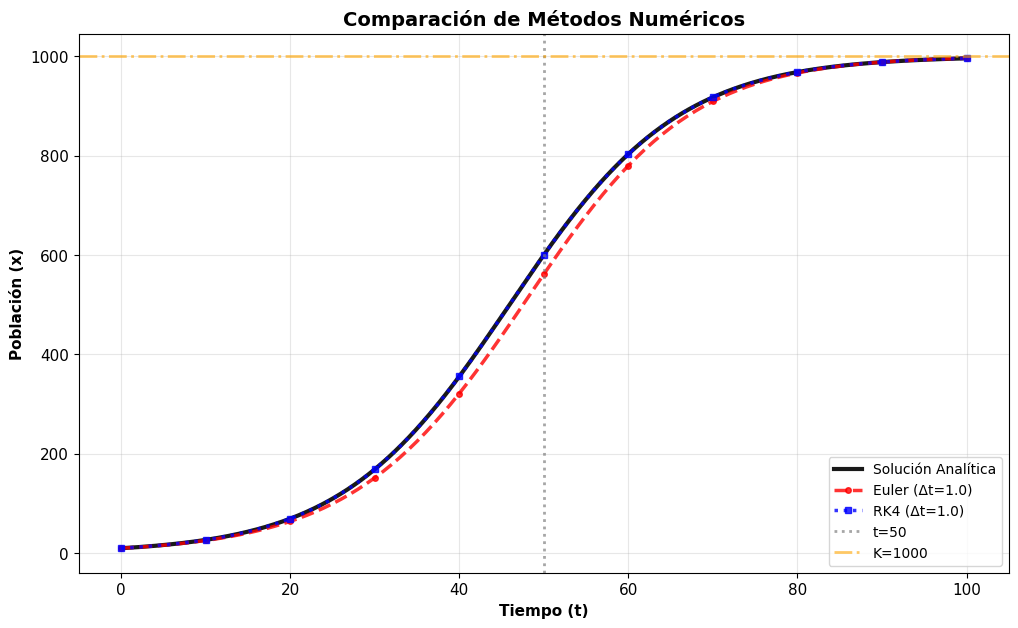

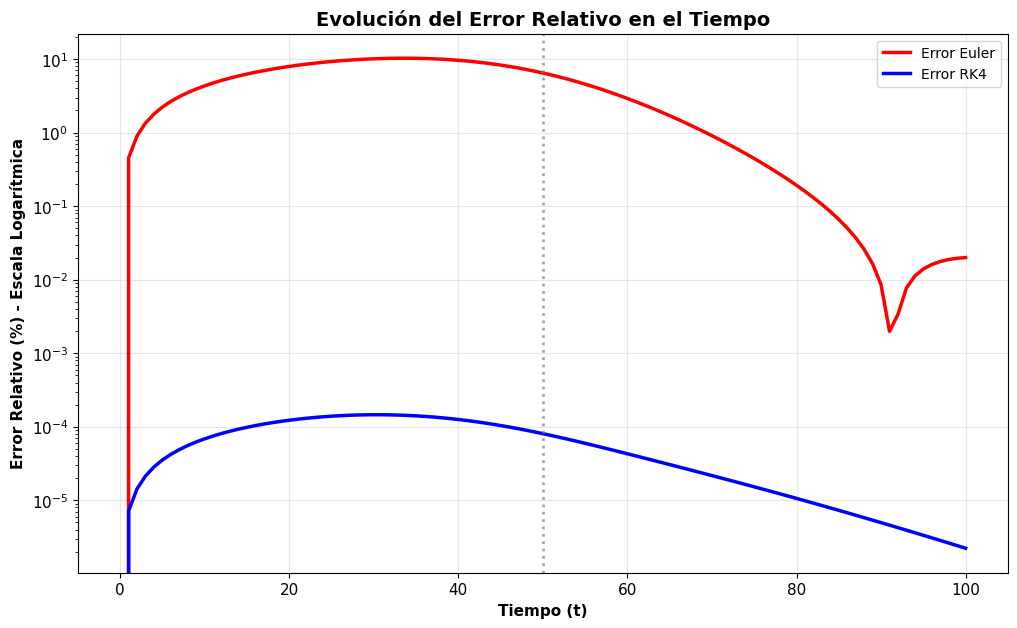

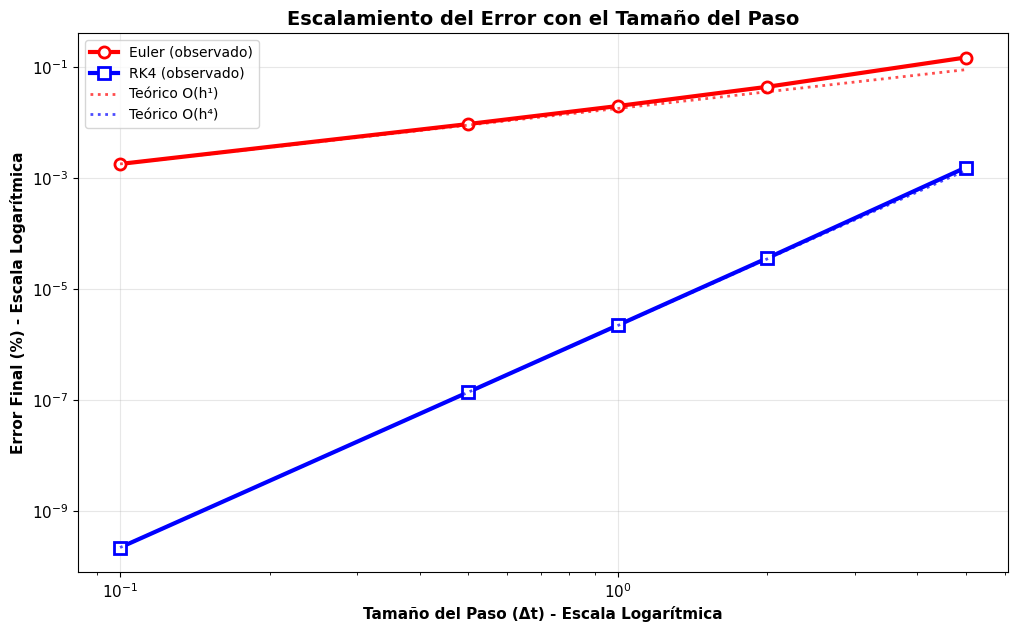

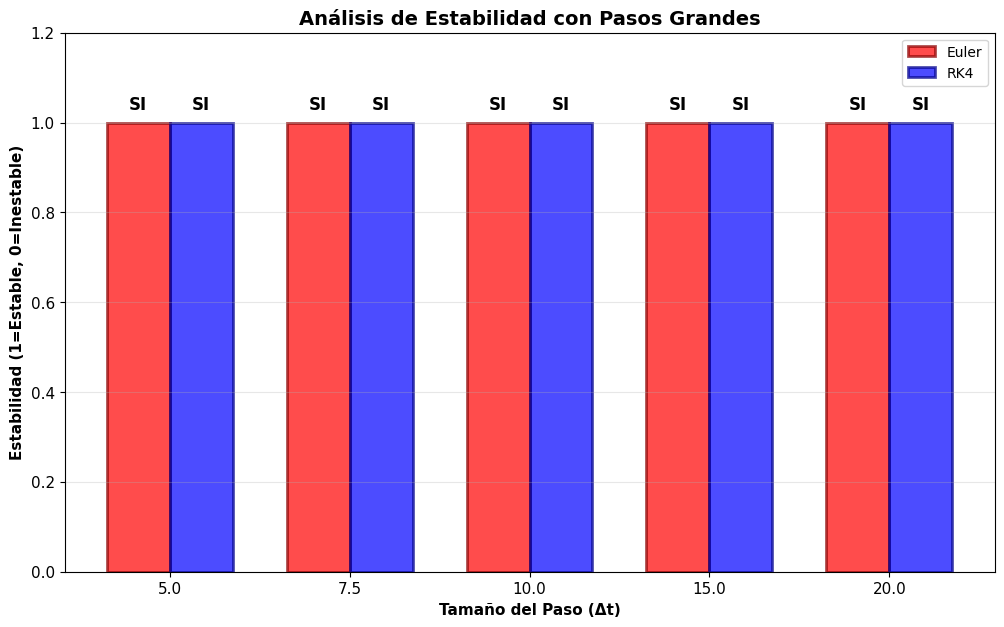

In [11]:

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
# GRÁFICO 1: Comparación de Soluciones

plt.figure(figsize=(12, 7))
plt.plot(t_analitica, x_analitica, 'k-', linewidth=3, label='Solución Analítica', alpha=0.9)
plt.plot(t_euler, x_euler, 'r--', linewidth=2.5, marker='o', markersize=4, 
         markevery=10, label=f'Euler (Δt={dt})', alpha=0.8)
plt.plot(t_rk4, x_rk4, 'b:', linewidth=2.5, marker='s', markersize=4, 
         markevery=10, label=f'RK4 (Δt={dt})', alpha=0.8)

plt.axvline(x=50, color='gray', linestyle=':', alpha=0.7, linewidth=2, label='t=50')
plt.axhline(y=K, color='orange', linestyle='-.', alpha=0.6, linewidth=2, label=f'K={K}')
plt.xlabel('Tiempo (t)', fontweight='bold')
plt.ylabel('Población (x)', fontweight='bold')
plt.title('Comparación de Métodos Numéricos', fontweight='bold', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# GRÁFICO 2: Error Relativo vs Tiempo
plt.figure(figsize=(12, 7))
error_euler_tiempo = np.abs(x_euler - solucion_analitica(t_euler, x0, r, K)) / solucion_analitica(t_euler, x0, r, K) * 100
error_rk4_tiempo = np.abs(x_rk4 - solucion_analitica(t_rk4, x0, r, K)) / solucion_analitica(t_rk4, x0, r, K) * 100

plt.semilogy(t_euler, error_euler_tiempo, 'r-', linewidth=2.5, label='Error Euler')
plt.semilogy(t_rk4, error_rk4_tiempo, 'b-', linewidth=2.5, label='Error RK4')
plt.axvline(x=50, color='gray', linestyle=':', alpha=0.7, linewidth=2)
plt.xlabel('Tiempo (t)', fontweight='bold')
plt.ylabel('Error Relativo (%) - Escala Logarítmica', fontweight='bold')
plt.title('Evolución del Error Relativo en el Tiempo', fontweight='bold', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# GRÁFICO 3: Escalamiento del Error con Δt
plt.figure(figsize=(12, 7))
dts = df_threshold['dt'].values
errores_euler = df_threshold['error_euler'].values
errores_rk4 = df_threshold['error_rk4'].values

plt.loglog(dts, errores_euler, 'r-o', linewidth=3, markersize=8, 
           label='Euler (observado)', markerfacecolor='white', markeredgewidth=2)
plt.loglog(dts, errores_rk4, 'b-s', linewidth=3, markersize=8, 
           label='RK4 (observado)', markerfacecolor='white', markeredgewidth=2)

# Líneas teóricas de referencia
dt_ref = np.array([0.1, 5.0])
error_ref_euler = errores_euler[0] * (dt_ref / dts[0])**1  # O(h^1)
error_ref_rk4 = errores_rk4[0] * (dt_ref / dts[0])**4    # O(h^4)

plt.loglog(dt_ref, error_ref_euler, 'r:', linewidth=2, alpha=0.7, label='Teórico O(h¹)')
plt.loglog(dt_ref, error_ref_rk4, 'b:', linewidth=2, alpha=0.7, label='Teórico O(h⁴)')

plt.xlabel('Tamaño del Paso (Δt) - Escala Logarítmica', fontweight='bold')
plt.ylabel('Error Final (%) - Escala Logarítmica', fontweight='bold')
plt.title('Escalamiento del Error con el Tamaño del Paso', fontweight='bold', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()


# GRÁFICO 4: Análisis de Estabilidad
plt.figure(figsize=(12, 7))
dt_estab = [r['dt'] for r in estabilidad_resultados]
estab_euler = [1 if r['estable_euler'] else 0 for r in estabilidad_resultados]
estab_rk4 = [1 if r['estable_rk4'] else 0 for r in estabilidad_resultados]

width = 0.35
x_pos = np.arange(len(dt_estab))
bars1 = plt.bar(x_pos - width/2, estab_euler, width, label='Euler', 
                color='red', alpha=0.7, edgecolor='darkred', linewidth=2)
bars2 = plt.bar(x_pos + width/2, estab_rk4, width, label='RK4', 
                color='blue', alpha=0.7, edgecolor='darkblue', linewidth=2)
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    plt.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.02,
             'SI' if height1 > 0 else 'NO', ha='center', va='bottom', fontsize=12, fontweight='bold')
    plt.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.02,
             'SI' if height2 > 0 else 'NO', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Tamaño del Paso (Δt)', fontweight='bold')
plt.ylabel('Estabilidad (1=Estable, 0=Inestable)', fontweight='bold')
plt.title('Análisis de Estabilidad con Pasos Grandes', fontweight='bold', fontsize=14)
plt.xticks(x_pos, [f'{dt:.1f}' for dt in dt_estab])
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 1.2)
plt.show()


### **Prompt para generación inicial del código - (ChatGPT)**
```txt
Hola necesito tu ayuda para el código inicial sería de implementar los métodos numéricos de Euler y RK4 por separado, para resolver un sistema no lineal. Necesito implementar ambos métodos para:
    - Modelo de crecimiento logístico, de manera que se pueda ver que sea correcto como una solución analitica 
    - Parámetros: r=0.1, K=1000, x₀=10, de manera que se entienda el crecimiento por unidad de tiempo en el caso de la tasa de crecimiento donde se puede ir haciendo simple para ir viendo y yo entendiendo el enfoque del método
    - Horizonte de tiempo: 100 unidades

Luego también tengo que ir analizando y comparando , viendo que es lo ideal. Donde considero que sería de buena ayuda agregar graficos como ir viendo la escabilidad, también ir viendo los errores. No sé que recomiendas que sea lo idea, si tomar en cuenta el tamaño de los pasos o bien todos los tiempos. Sería ideal hacer varios para ir comparando. 
    - Error relativo en t=50 para Δt=1.0, 
    - Threshold entre tiempo de cómputo y precisión
    - Estabilidad con Δt grandes (>5.0) tomando en cuenta si puede ser compresivo. 
En general se puede ir tomando en cuenta los puntos criticos del modelo. 
```

### **Referencias**

Daniel Aronson, D. A. (s/f). Step-By-Step Stocks and Flows: Converting From Causal Loop Diagrams. Thesystemsthinker.com. https://thesystemsthinker.com/step-by-step-stocks-and-flows-converting-from-causal-loop-diagrams/

Lesson 2 - understanding feedback loops - GoldSim. (s/f). Goldsim.com. https://www.goldsim.com/Courses/BasicGoldSim/Unit8/Lesson2/

Marathe, P. (2022, septiembre 9). Euler’s method and Runge Kutta 4th order method in python. Medium. https://medium.com/@pukumarathe/eulers-method-and-runge-kutta-4th-order-method-in-python-b4a0068a8ebe

Método de Euler. (s/f). Khanacademy.org.https://es.khanacademy.org/math/ap-calculus-bc/bc-differential-equations-new/bc-7-5/e/euler-s-method

Upadhyay, A. (2020, agosto 10). Precision/recall tradeoff - analytics Vidhya - medium. Analytics Vidhya. https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134